In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer=pd.read_csv(r"C:\Users\Sumit\OneDrive\Documents\Prac_datasets\Portfilio_project\Flipkart_Customer.csv")

In [34]:
customer.head()

,customer_id,first_name,last_name,email,gender,city,country,join_date
0,1,Siya,Davis,siya.davis@gmail.com,Female,Nagpur,India,9/24/2024
1,2,Benjamin,Patel,benjamin.patel@company.com,Male,Paris,France,9/28/2022
2,3,Leo,Williams,leo.williams@company.com,Other,Thane,India,4/21/2022
3,4,Amelia,Harris,amelia.harris@gmail.com,Female,Visakhapatnam,India,8/21/2023
4,5,Emma,Thomas,emma.thomas@hotmail.com,Male,Thane,India,10/17/2023


In [5]:
customer.isna().sum()

Customer_ID    0
First_Name     0
Last_Name      0
Email          0
Gender         0
City           0
Country        0
Join_date      0
dtype: int64

In [7]:
orderdetails=pd.read_csv(r"C:\Users\Sumit\OneDrive\Documents\Prac_datasets\Portfilio_project\Flipkart_Orderdetails.csv")

In [35]:
orderdetails.head()

,order_id,product_id,quantity,discount,payment_mode
0,500001,2979,3,0%,Debit Card
1,500001,3631,4,15%,Wallet
2,500001,1504,1,14%,NetBanking
3,500001,1016,4,0%,Debit Card
4,500001,3160,1,2%,COD


In [8]:
orderdetails.isnull().sum()

order_id        0
product_id      0
quantity        0
discount        0
Payment_Mode    0
dtype: int64

In [10]:
orders=pd.read_csv(r"C:\Users\Sumit\OneDrive\Documents\Prac_datasets\Portfilio_project\Flipkart_Orders.csv")

In [36]:
orders.head()

,order_id,customer_id,order_date,payment_mode,total_amount
0,500001,4779,9/5/2024,NetBanking,533865
1,500002,5645,12/10/2024,Credit Card,126748
2,500003,2094,12/5/2023,Cash on Delivery,155802
3,500004,3574,12/14/2022,UPI,160658
4,500005,5432,8/14/2025,UPI,226190


In [11]:
orders.isnull().sum()

order_id        0
customer_id     0
order_date      0
payment_mode    0
total_amount    0
dtype: int64

In [13]:
products=pd.read_csv(r"C:\Users\Sumit\OneDrive\Documents\Prac_datasets\Portfilio_project\Flipkart_Products.csv")

In [37]:
products.head()

,product_id,category,brand,price
0,2204,Fashion,Heritage,4490
1,3828,Beauty & Personal Care,RootRise,10000
2,3326,Home & Kitchen,CoolBreeze,35000
3,4917,Sports & Outdoors,MotionMade,2070
4,4822,Sports & Outdoors,FlexForge,7960


In [16]:
products.isnull().sum()

Product_ID    0
Category      0
Brand         0
Price         0
dtype: int64

In [18]:
returns=pd.read_csv(r"C:\Users\Sumit\OneDrive\Documents\Prac_datasets\Portfilio_project\Flipkart_Returns.csv")

In [38]:
returns.head()

,return_id,order_id,reason,return_date
0,900001,524292,Arrived Late,8/19/2024
1,900002,524295,Size/Fit Issue,1/1/2025
2,900003,516105,Size/Fit Issue,6/12/2023
3,900004,524300,Size/Fit Issue,4/21/2025
4,900005,524308,Arrived Late,3/16/2024


In [19]:
returns.isnull().sum()

Return_ID      0
Order_ID       0
Reason         0
Return_Date    0
dtype: int64

In [32]:
customer.columns = customer.columns.str.lower()
orders.columns = orders.columns.str.lower()
orderdetails.columns = orderdetails.columns.str.lower()
products.columns = products.columns.str.lower()
returns.columns = returns.columns.str.lower()

In [39]:
# Merge orders with customers (on customer_id)
master_df = orders.merge(customer, on="customer_id", how="left")

# Add orderdetails (on order_id)
master_df = master_df.merge(orderdetails, on="order_id", how="left")

# Add products (on product_id)
master_df = master_df.merge(products, on="product_id", how="left")

# Add returns (on order_id) – left join keeps all orders
master_df = master_df.merge(returns, on="order_id", how="left")

# Sales & Revenue Insights

## What is the total_amount contribution of each day of the week?

In [42]:
master_df['order_day'] = pd.to_datetime(master_df['order_date']).dt.day_name()
day_total_amount = master_df.groupby('order_day')['total_amount'].sum().sort_values(ascending=False)
print(day_total_amount)


order_day
Monday       2954299645
Saturday     2937838447
Friday       2902919233
Thursday     2882258087
Tuesday      2851683874
Sunday       2841516985
Wednesday    2811968738
Name: total_amount, dtype: int64


## What is the hourly order distribution (peak shopping hours)?

<Axes: xlabel='order_hour'>

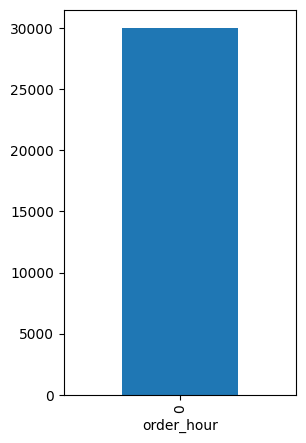

In [47]:
master_df['order_hour'] = pd.to_datetime(master_df['order_date']).dt.hour
hourly_orders = master_df.groupby('order_hour')['order_id'].nunique()
hourly_orders.plot(kind='bar', figsize=(3,5))


## Which product categories have the highest discount rates on average?

In [53]:
# Extract the first percentage value from each cell
master_df['discount_clean'] = master_df['discount'].str.extract(r'(\d+)%').astype(float)

# Now calculate mean discounts by category
category_discounts = master_df.groupby('category')['discount_clean'].mean().sort_values(ascending=False)
print(category_discounts)

category
Beauty & Personal Care    8.425639
Sports & Outdoors         8.397074
Home & Kitchen            8.393207
Fashion                   8.392630
Electronics               8.388242
Name: discount_clean, dtype: float64


## What percentage of total amount comes from top 10% of products?

In [56]:
product_rev = master_df.groupby('product_id')['total_amount'].sum().sort_values(ascending=False)
top10_share = product_rev.head(int(len(product_rev)*0.1)).sum() / product_rev.sum() * 100
print(f"Top 10% products contribute {top10_share:.2f}% of totalamount")

Top 10% products contribute 20.99% of totalamount


# Customer Insights

## What is the gender ratio of total orders?

<Axes: xlabel='gender'>

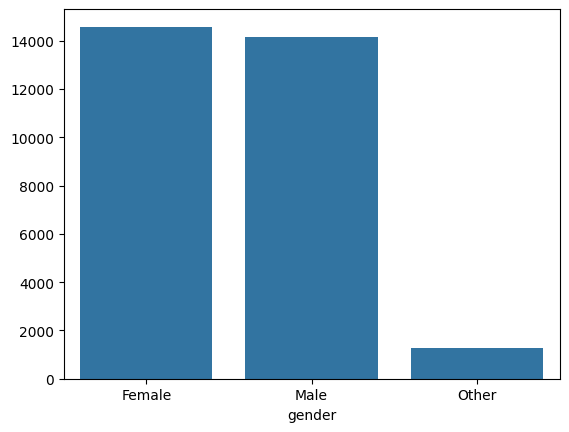

In [57]:
gender_orders = master_df.groupby('gender')['order_id'].nunique()
sns.barplot(x=gender_orders.index, y=gender_orders.values)

## What is the total revenue per month (trend analysis)?

In [61]:
# Convert order_date to datetime
master_df['order_date'] = pd.to_datetime(master_df['order_date'])

# Extract year-month
master_df['year_month'] = master_df['order_date'].dt.to_period('M')

# Monthly revenue
monthly_revenue = master_df.groupby('year_month')['total_amount'].sum()
print(monthly_revenue)


year_month
2022-01      9196006
2022-02     11991017
2022-03     43459073
2022-04     50290855
2022-05     61286399
2022-06     86861411
2022-07     88622139
2022-08    100217873
2022-09    113155806
2022-10    138234961
2022-11    199112395
2022-12    210738498
2023-01    202498801
2023-02    227768734
2023-03    234412926
2023-04    278585550
2023-05    282266037
2023-06    277170250
2023-07    377454699
2023-08    356962884
2023-09    398242926
2023-10    439857555
2023-11    429890137
2023-12    506009454
2024-01    509897496
2024-02    523064942
2024-03    569854433
2024-04    564175279
2024-05    624866069
2024-06    667638002
2024-07    759766649
2024-08    787267707
2024-09    783178393
2024-10    922087580
2024-11    872314674
2024-12    922261121
2025-01    852597301
2025-02    856019975
2025-03    917997672
2025-04    845581418
2025-05    899582980
2025-06    879218464
2025-07    879242626
2025-08    421585842
Freq: M, Name: total_amount, dtype: int64


## What is the Average Order Value (AOV) by payment mode?

In [62]:
aov_payment = master_df.groupby('payment_mode_x')['total_amount'].mean().sort_values(ascending=False)
print(aov_payment)

payment_mode_x
Cash on Delivery    229344.607716
UPI                 227371.993135
NetBanking          223500.011780
Wallet              223373.838740
Credit Card         222909.190812
Debit Card          221004.898917
Name: total_amount, dtype: float64


## Which brand generates the most revenue overall?

In [63]:
brand_revenue = master_df.groupby('brand')['total_amount'].sum().sort_values(ascending=False).head(10)
print(brand_revenue)


brand
CoreLink       934429748
ApexOne        930457509
TechSphere     929631244
ElectraNova    827894853
Zentrix        774499541
GigaMax        701839382
BlueWave       699516061
OrbitX         623504484
PulseGear      523564601
HomePulse      519391944
Name: total_amount, dtype: int64


# Customer Insights

## How many new customers joined each month?

In [64]:
master_df['join_date'] = pd.to_datetime(master_df['join_date'])
master_df['join_month'] = master_df['join_date'].dt.to_period('M')

new_customers = master_df.groupby('join_month')['customer_id'].nunique()
print(new_customers)


join_month
2022-01    312
2022-02    238
2022-03    289
2022-04    296
2022-05    299
2022-06    250
2022-07    298
2022-08    283
2022-09    269
2022-10    294
2022-11    307
2022-12    269
2023-01    274
2023-02    254
2023-03    293
2023-04    286
2023-05    282
2023-06    279
2023-07    314
2023-08    330
2023-09    276
2023-10    301
2023-11    273
2023-12    280
2024-01    296
2024-02    273
2024-03    243
2024-04    264
2024-05    297
2024-06    267
2024-07    291
2024-08    303
2024-09    255
2024-10    163
Freq: M, Name: customer_id, dtype: int64


## What is the gender distribution of revenue?

In [65]:
gender_rev = master_df.groupby('gender')['total_amount'].sum()
print(gender_rev)


gender
Female    9837373339
Male      9453484245
Other      891627425
Name: total_amount, dtype: int64


## Which city contributes the most customers?

In [66]:
city_customers = master_df.groupby('city')['customer_id'].nunique().sort_values(ascending=False).head(10)
print(city_customers)


city
Paris        368
Lucknow      367
Mumbai       361
Singapore    353
Tokyo        353
Bengaluru    348
Berlin       346
Ahmedabad    340
Patna        339
Dubai        336
Name: customer_id, dtype: int64


# Product & Category Insights

## Which categories generate the highest revenue?

In [67]:
category_rev = master_df.groupby('category')['total_amount'].sum().sort_values(ascending=False)
print(category_rev)


category
Electronics               6421772822
Home & Kitchen            3753751878
Sports & Outdoors         3617265908
Fashion                   3246800468
Beauty & Personal Care    3142893933
Name: total_amount, dtype: int64


## What is the average discount applied by category?

In [68]:
category_discount = master_df.groupby('category')['discount_clean'].mean().sort_values(ascending=False)
print(category_discount)


category
Beauty & Personal Care    8.425639
Sports & Outdoors         8.397074
Home & Kitchen            8.393207
Fashion                   8.392630
Electronics               8.388242
Name: discount_clean, dtype: float64


## Which products are the bestsellers (by quantity sold)?

In [69]:
product_sales = master_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(10)
print(product_sales)


product_id
2553    112
1134    111
4442    108
4508    102
3755    100
4100     99
4132     97
3395     97
2863     96
4115     96
Name: quantity, dtype: int64


# Returns & Refunds

## What is the overall return rate (% of orders returned)?

In [70]:
return_rate = master_df['return_id'].notnull().mean() * 100
print(f"Overall Return Rate: {return_rate:.2f}%")


Overall Return Rate: 11.97%


## Which brands have the highest return rate?

In [71]:
brand_return_rate = master_df.groupby('brand')['return_id'].apply(lambda x: x.notnull().mean()).sort_values(ascending=False).head(10)
print(brand_return_rate)


brand
Zentrix       0.131360
FlexForge     0.130347
ZenLiving     0.130147
GlowWell      0.129211
Heritage      0.128791
SilkStrand    0.127257
PureLeaf      0.127182
PeakPath      0.123867
VelvetMist    0.123835
CorePlus      0.123383
Name: return_id, dtype: float64


## What are the top 5 most common reasons for returns?

In [72]:
reason_counts = master_df['reason'].value_counts().head(5)
print(reason_counts)


reason
Wrong Item Delivered       1898
Size/Fit Issue             1859
Damaged/Defective          1826
Quality Not As Expected    1822
Changed Mind               1675
Name: count, dtype: int64


# Payment Behavior

## What is the distribution of payment methods used?

In [73]:
payment_distribution = master_df['payment_mode_x'].value_counts(normalize=True) * 100
print(payment_distribution)


payment_mode_x
UPI                 17.020164
NetBanking          16.814297
Debit Card          16.645153
Credit Card         16.591739
Cash on Delivery    16.498264
Wallet              16.430384
Name: proportion, dtype: float64


## Which payment method generates the highest average order value?

In [74]:
aov_payment = master_df.groupby('payment_mode_x')['total_amount'].mean().sort_values(ascending=False)
print(aov_payment)


payment_mode_x
Cash on Delivery    229344.607716
UPI                 227371.993135
NetBanking          223500.011780
Wallet              223373.838740
Credit Card         222909.190812
Debit Card          221004.898917
Name: total_amount, dtype: float64


# Time-Based Analysis

## What are the peak hours of the day for orders?

In [75]:
hourly_orders = master_df.groupby('order_hour')['order_id'].nunique()
print(hourly_orders)


order_hour
0    30000
Name: order_id, dtype: int64


## What is the revenue contribution by day of the week?

In [76]:
day_revenue = master_df.groupby('order_day')['total_amount'].sum().sort_values(ascending=False)
print(day_revenue)


order_day
Monday       2954299645
Saturday     2937838447
Friday       2902919233
Thursday     2882258087
Tuesday      2851683874
Sunday       2841516985
Wednesday    2811968738
Name: total_amount, dtype: int64


# Geographic Insights

## Which countries generate the highest revenue?

In [77]:
country_revenue = master_df.groupby('country')['total_amount'].sum().sort_values(ascending=False).head(10)
print(country_revenue)


country
India         13747992863
 Canada         791066871
 Australia      762568070
 Japan          747379844
 Singapore      740841723
 France         740622983
 UAE            714545756
 USA            656983659
 UK             656239270
 Germany        624243970
Name: total_amount, dtype: int64


## What is the average order value per city?

In [78]:
city_aov = master_df.groupby('city')['total_amount'].mean().sort_values(ascending=False).head(10)
print(city_aov)


city
Sydney       237043.229717
Toronto      235016.895722
Lucknow      232433.998553
Thane        228991.725947
Nagpur       228043.316394
Singapore    228021.459834
Surat        227784.781749
London       227387.134442
Tokyo        227236.194588
Delhi        226627.861301
Name: total_amount, dtype: float64


# Discount Analysis

## Does giving discounts increase average order size (quantity)?

In [79]:
discount_quantity = master_df.groupby(pd.cut(master_df['discount_clean'], bins=[0,10,20,30,50,100]))['quantity'].mean()
print(discount_quantity)


discount_clean
(0, 10]      2.510698
(10, 20]     2.503966
(20, 30]     2.502857
(30, 50]     2.636364
(50, 100]         NaN
Name: quantity, dtype: float64


C:\Users\Sumit\AppData\Local\Temp\ipykernel_10644\2128182596.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_quantity = master_df.groupby(pd.cut(master_df['discount_clean'], bins=[0,10,20,30,50,100]))['quantity'].mean()


## What is the total revenue lost due to discounts?

In [80]:
master_df['discount_loss'] = master_df['price'] * master_df['quantity'] * (master_df['discount_clean']/100)
total_loss = master_df['discount_loss'].sum()
print(f"Total revenue lost due to discounts: {total_loss}")


Total revenue lost due to discounts: 506814595.0


## Revenue by Brand (Top 10)

C:\Users\Sumit\AppData\Local\Temp\ipykernel_10644\480729517.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_amount', y='brand', data=brand_revenue, palette='viridis')


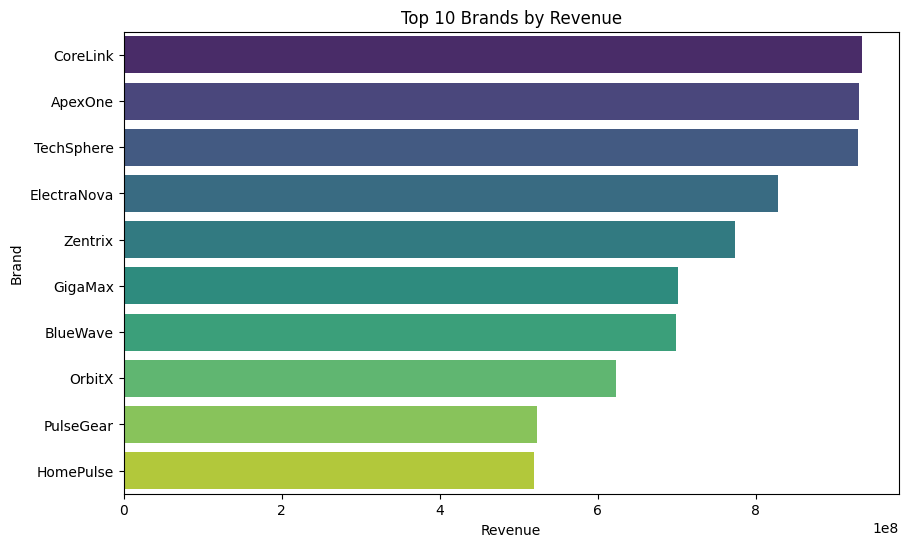

In [81]:
brand_revenue = master_df.groupby('brand')['total_amount'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x='total_amount', y='brand', data=brand_revenue, palette='viridis')
plt.title("Top 10 Brands by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Brand")
plt.show()

## Gender-wise Revenue Contribution

C:\Users\Sumit\AppData\Local\Temp\ipykernel_10644\4255853378.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='total_amount', data=gender_rev, palette='Set2')


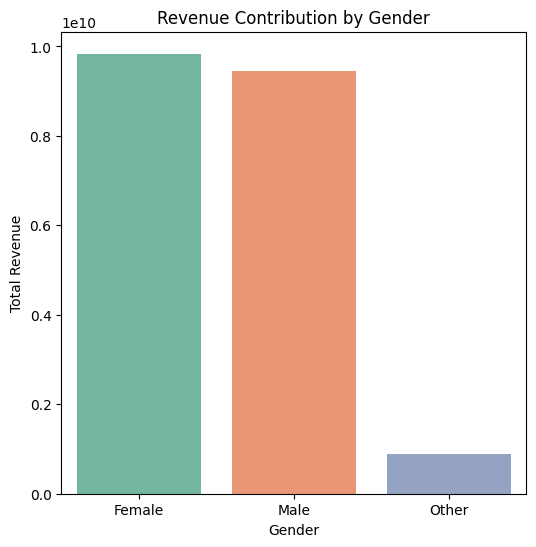

In [82]:
gender_rev = master_df.groupby('gender')['total_amount'].sum().reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='gender', y='total_amount', data=gender_rev, palette='Set2')
plt.title("Revenue Contribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Revenue")
plt.show()


## Average Order Value by Payment Mode

C:\Users\Sumit\AppData\Local\Temp\ipykernel_10644\2359997983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_mode_x', y='total_amount', data=aov_payment, palette='coolwarm')


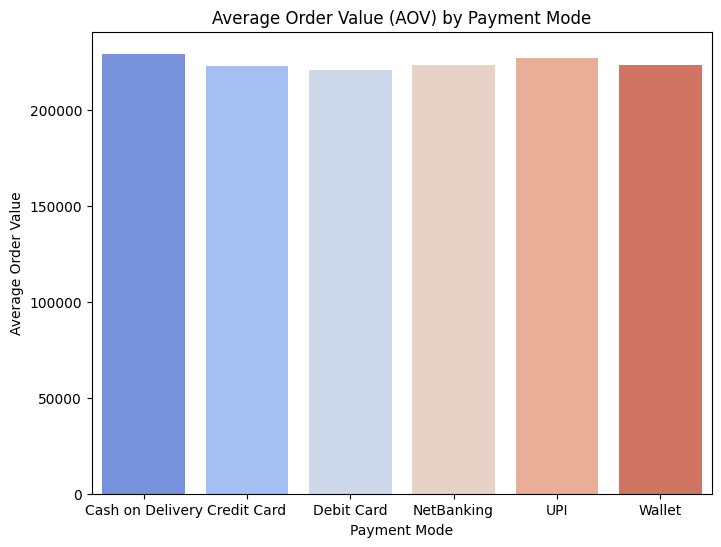

In [83]:
aov_payment = master_df.groupby('payment_mode_x')['total_amount'].mean().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='payment_mode_x', y='total_amount', data=aov_payment, palette='coolwarm')
plt.title("Average Order Value (AOV) by Payment Mode")
plt.xlabel("Payment Mode")
plt.ylabel("Average Order Value")
plt.show()


## Monthly Revenue Trend

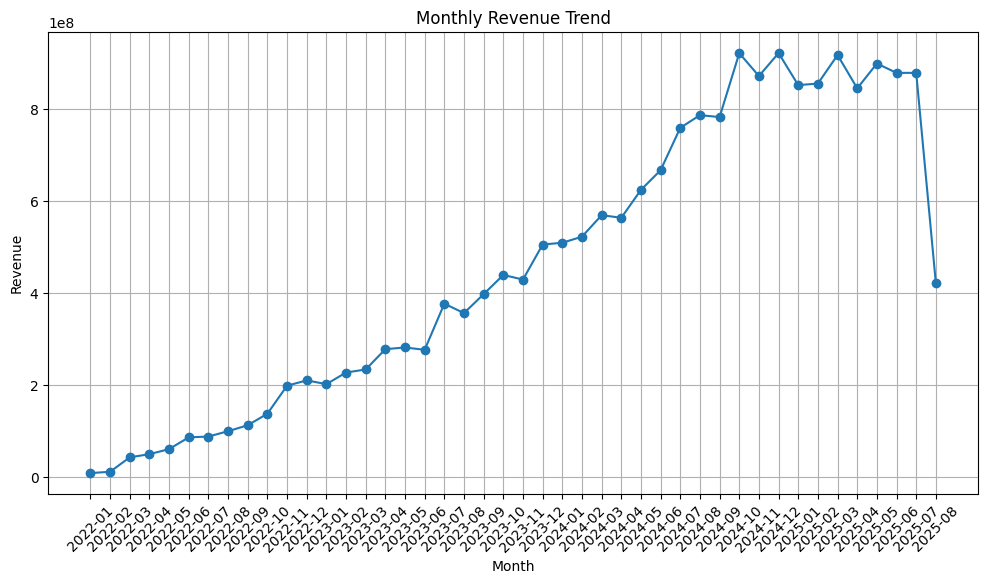

In [84]:
master_df['order_date'] = pd.to_datetime(master_df['order_date'])
master_df['year_month'] = master_df['order_date'].dt.to_period('M')

monthly_revenue = master_df.groupby('year_month')['total_amount'].sum()

plt.figure(figsize=(12,6))
plt.plot(monthly_revenue.index.astype(str), monthly_revenue.values, marker='o')
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## Top 5 Cities by Revenue

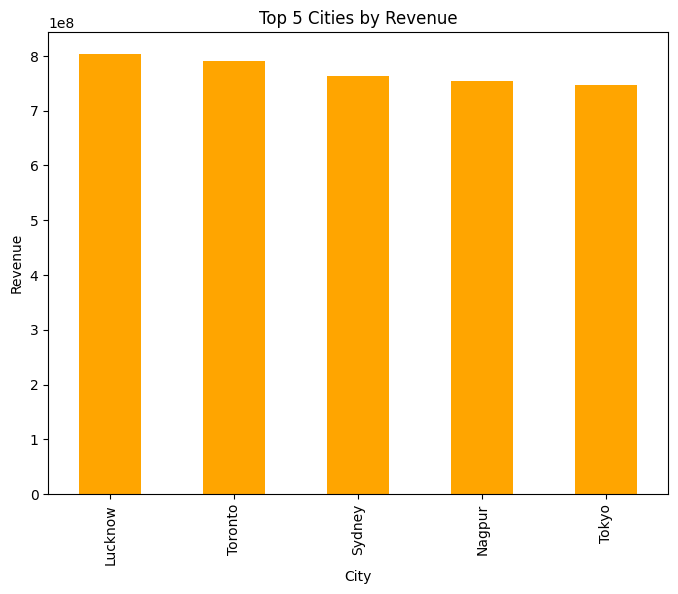

In [85]:
city_revenue = master_df.groupby('city')['total_amount'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(8,6))
city_revenue.plot(kind='bar', color='orange')
plt.title("Top 5 Cities by Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()


In [86]:
## Order Distribution by Hour of the Day

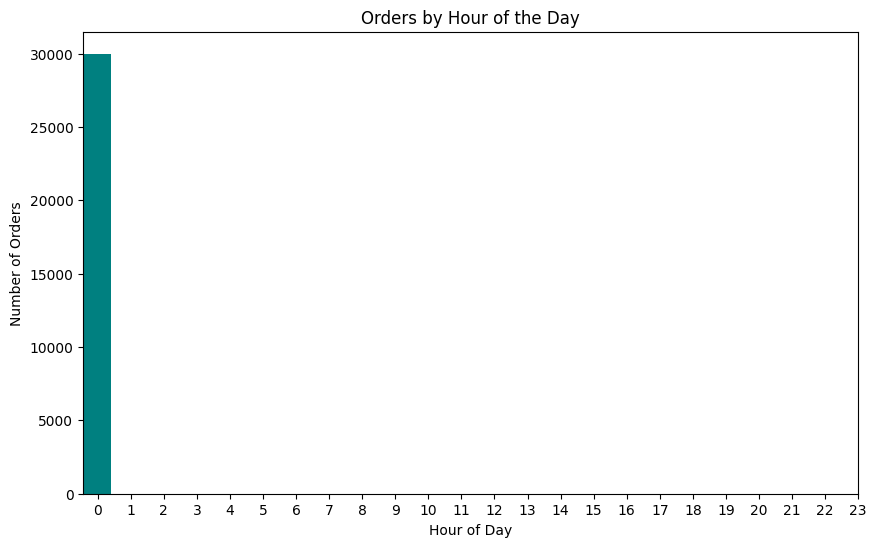

In [87]:
hourly_orders = master_df.groupby('order_hour')['order_id'].nunique()

plt.figure(figsize=(10,6))
plt.bar(hourly_orders.index, hourly_orders.values, color='teal')
plt.title("Orders by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0,24))
plt.show()
